# 5 - Agrupamentos

Para compreender como os distritos podem ser agrupados, serão gerados gráficos de dispersão.

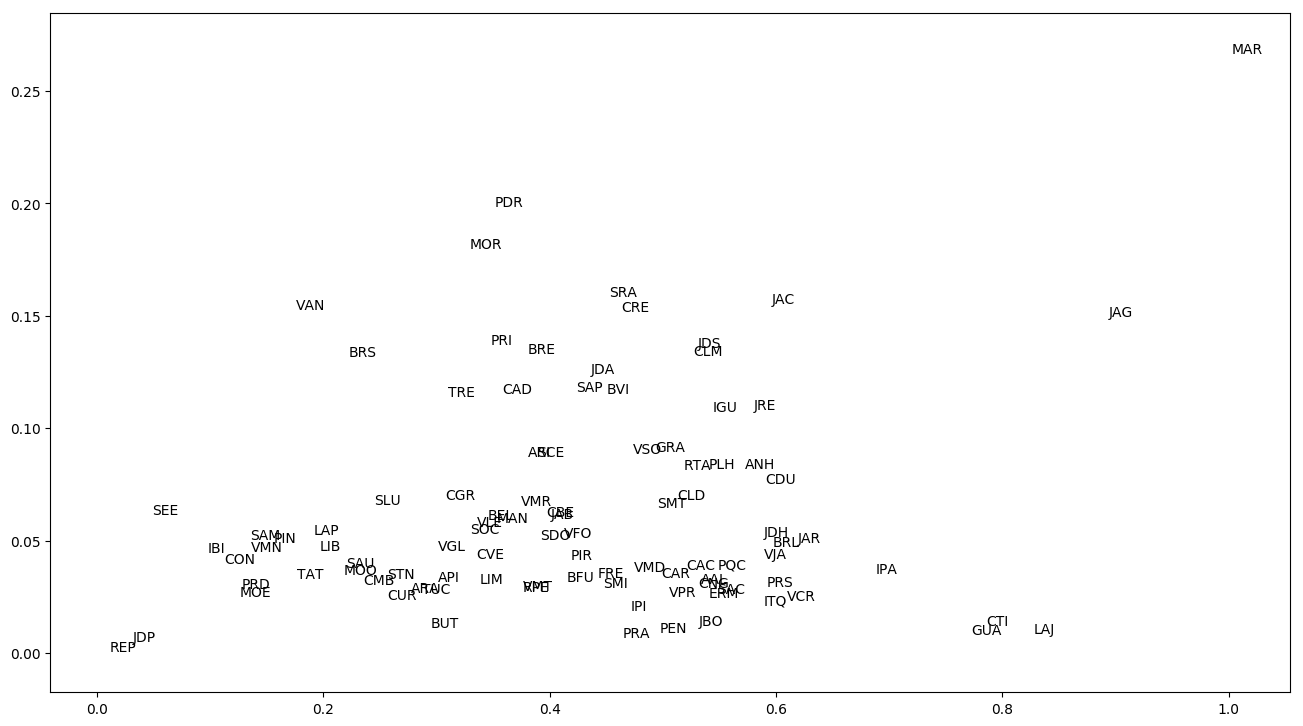

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 16, 9
rcParams['figure.dpi'] = 100

dados_educ_pop = pd.read_csv('dados/dados_educ_pop.csv', sep = ',')
dados_educ_pop = dados_educ_pop[dados_educ_pop['MES_ANO_REF'] == 'dez-17']

plt.scatter(dados_educ_pop['MAT_CRECHE']/dados_educ_pop['TOTAL'], dados_educ_pop['DEM_CRECHE']/dados_educ_pop['TOTAL'], color='')

for i in dados_educ_pop.index:
    plt.annotate(dados_educ_pop.at[i, 'SIGLA_DIST'], (dados_educ_pop.at[i, 'MAT_CRECHE']/dados_educ_pop.at[i, 'TOTAL'], dados_educ_pop.at[i, 'DEM_CRECHE']/dados_educ_pop.at[i, 'TOTAL']))